In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [8]:
data = pd.read_csv("avocado.csv")
data.drop("Unnamed: 0", axis=1,inplace=True)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# We can see there is no null values. We have 18249 records.
No need to add values on the provided data.



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [12]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Visualization:
In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.
We use different graph include:
Bar plot
Count plot
Line plot
Histogram and Pair plot

In [13]:
#Checking ratio of the month and price that which year had max avrg price
sns.barplot(x="Month", y= "AveragePrice", data=data)

ValueError: Could not interpret input 'Month'

# September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

# Plotting Histogram:
A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite
So, in this we can also check whether the graph is right skewed, left skew or the graph is normally distributed graph

In [ ]:
data.hist(figsize=(20,20) , grid = True, layout =(4,4), bins=30)

# Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.


# Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction
Also, number of rows in each column are same, means there are no null values in the data set.
Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
Most of the column statistics data are near to 0 values.
By checking the difference between the 75% and max value there are outliers in some of the column

In [ ]:
#Checking the skewness
data.skew()

In [ ]:
# Maiking the skew less than or equal to 0.55 for better prediction
skew=('Total Volume','4046','4225','4770','Total Bags', 'Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if data.skew().loc[col]>0.55:
        data[col] = np.loglp(data[col])

In [ ]:
incorrectdata = data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) != data['Total Volume'] ) | ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) != data['Total Bags'] )]
correctdata=  data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) == data['Total Volume'] ) & ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) == data['Total Bags'] )]

incorrectdata.reset_index(inplace = True)
correctdata.reset_index(inplace = True)


In [ ]:
print("Data Total",data.shape)
print("Incorrect Data",incorrectdata.shape)
print("correct Data",correctdata.shape)

In [ ]:
correctdata.isnull().sum()

In [ ]:
#average price of avacado price in past 4 years

data['AveragePrice'].mean()

In [ ]:
# average min price of avocado in last 4 years
data['AveragePrice'].min()

In [ ]:
# Max price of avocado in past 4 years
data['AveragePrice'].max()

In [ ]:
# max avocado sold in last 4 years
data['Total Volume'].max()

In [ ]:
# organic and conventional purchase of avocado 
data['type'].value_counts()

In [ ]:
# checking the co relation between total bags and total volume 
data[['Total Volume','Total Bags']].corr()

In [ ]:
sns.heatmap(data[['Total Volume','Total Bags']].corr())

In [ ]:
# what must be the average volume of avacado per year 
data.groupby('year')['Total Volume'].mean()

In [ ]:
# average price of avacado depending on the region in last 4 years 
data.groupby('region')['AveragePrice'].mean()

In [ ]:
# costly avacado more than average in a particular year 
data[data['AveragePrice'] > data['AveragePrice'].mean()][['AveragePrice','4046','4225','4770']].sort_values(by = ['AveragePrice'])

In [ ]:
#Average price of Organic Avocado in last years of which regions
organic = data[data['type'] == 'organic']
organic

In [ ]:
#average Organic Avacado cost in last 4 years
organic.groupby('year')['AveragePrice'].mean()

In [ ]:
#list of average Organic Avacado cost in different regions in last 4 years
organic.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

In [ ]:
# finding sales by regions and later build it by year
data.groupby('region')['Total Volume'].mean().sort_values()

In [ ]:
#each year in last 4 years how many types of avacado got sold
data.groupby('year')['type'].value_counts()

In [ ]:
#total no of sales in each year of last 4 years
data.groupby('year')['Total Volume'].count()

In [ ]:
#Data avialable for each year..in the dataset for last 4 years
data.groupby('year')['Total Volume'].size()

In [ ]:
 #Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together
data[['4046','Small Bags','Total Volume','Total Bags']].corr()

In [ ]:
sns.heatmap(data[['4046','Small Bags','Total Volume','Total Bags']].corr())

In [ ]:
sns.heatmap(data[['4225','Large Bags','Total Volume','Total Bags']].corr())

In [ ]:
sns.heatmap(data[['4770','XLarge Bags','Total Volume','Total Bags']].corr())

In [ ]:
sns.heatmap(data[['4046','4770','4225','Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr())

In [ ]:
#Average Sales of Avacados by month 
data['Month'] = data['Date'].apply(lambda date:pd.Period(date, freq='M'))

In [ ]:
avg_monthly_sales = data.groupby(data['Month'])['Total Volume'].mean()
avg_monthly_sales

In [ ]:
sns.distplot(avg_monthly_sales,bins=10, kde=False)


In [ ]:
#Sales of Avacados by Quater of each year in last 4 years
data['Quater'] = data['Date'].apply(lambda date:pd.Period(date, freq='Q'))

In [ ]:
data.head(6)

In [ ]:
avg_Q_sales = data.groupby(data['Quater'])['Total Volume'].mean()

In [ ]:
avg_Q_sales

In [ ]:
#showing the Average price in four years(Avg Price of Avacado ranged between $1.0 and $1.5)
sns.distplot(data['AveragePrice'],bins=10, kde=False)

In [ ]:
#Avg Price of Avacados greater than the Average Price of Avacados in last 4 years
sns.jointplot(x='AveragePrice', y='year', data=data[data['AveragePrice'] > data['AveragePrice'].mean()], kind='hex', 
              gridsize=20)

In [ ]:
sns.distplot(data.groupby('region')['4225'].mean(),bins=10, kde=False)

In [ ]:
#Average sales of PLU 4770 by region.
data.groupby('region')['4770'].mean()
sns.distplot(data.groupby('region')['4770'].mean(),bins=10, kde=False)

In [ ]:
#avo.groupby('region')['4046'].mean()
## Looks like PLU 4046 and PLU 4225 are preffered same across All S regions.
sns.distplot(data.groupby('region')['4046'].mean(),bins=10, kde=False)

# Types of avacado and their prices

In [ ]:
#Here we will plot the box plot and compare the type and their prices 
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'pink')


# Above boxplot we can say that Organic fruit price is more as compared to conventional fruit.

In [ ]:
label = LabelEncoder()
dicts = {}

label.fit(data.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
data.type = label.transform(data.type)


In [ ]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)


# From the above we can conclude that  there is a strong relation between TotalBags and TotalVolume ie, 0.96 and also Type and AveragePrice ie, 0.62.
Other than that there is weak realation.



In [ ]:
#Lets check with the Region Vs Year distribution¶

In [ ]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

# The Above graph shows that the year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

In [ ]:
#Lets check Region Vs AveragePrice distribution also
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})


# Here from the above graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.

In [ ]:
# Now we will classify the types of avocado using logistic regression
from sklearn.model_selection import train_test_split

X=data[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=data.type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

In [ ]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))



#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)




In [ ]:
#Lets try using Random forest classifier
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))


#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)




In [ ]:
#Lets predict the price of avocado
data.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year'], axis = 1,inplace = True)


In [ ]:
data.columns


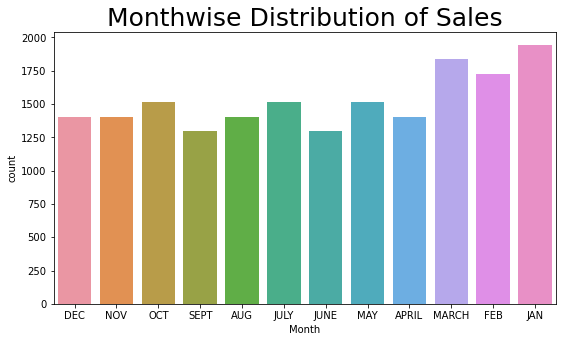

In [23]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [24]:
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [25]:
!pip install xgboost

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [28]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)



In [29]:
!pip install tensorflow

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [32]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
103/103 [==============================] - 5s 9ms/step - loss: 95.7132 - val_loss: 1.3593
Epoch 2/150
103/103 [==============================] - 1s 6ms/step - loss: 0.8505 - val_loss: 0.9030
Epoch 3/150
103/103 [==============================] - 1s 5ms/step - loss: 0.4936 - val_loss: 0.6519
Epoch 4/150
103/103 [==============================] - 1s 5ms/step - loss: 0.3954 - val_loss: 0.5684
Epoch 5/150
103/103 [==============================] - 1s 5ms/step - loss: 0.3437 - val_loss: 0.4937
Epoch 6/150
103/103 [==============================] - 1s 6ms/step - loss: 0.3030 - val_loss: 0.4462
Epoch 7/150
103/103 [==============================] - 1s 6ms/step - loss: 0.2729 - val_loss: 0.3418
Epoch 8/150
103/103 [==============================] - 1s 7ms/step - loss: 0.2407 - val_loss: 0.2403
Epoch 9/150
103/103 [==============================] - 1s 6ms/step - loss: 0.2144 - val_loss: 0.1862
Epoch 10/150
103/103 [==============================] - 1s 6ms/step - loss: 0.1969 - val_l

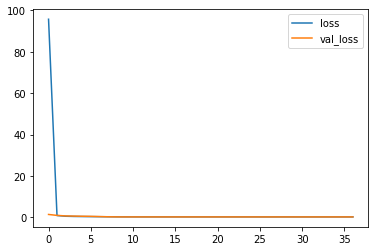

In [33]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [34]:
dnn_pred = model.predict(X_test)

In [35]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.192,0.063,0.612
Decision Tree,0.137,0.045,0.727
Random Forest,0.097,0.019,0.884
Support Vector Machines,0.118,0.027,0.835
K-nearest Neighbors,0.101,0.024,0.855
XGBoost,0.096,0.017,0.893
Deep Neural Network,0.324,0.164,-0.003


In [36]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"


'10% of mean of target variable is 0.141'

# Let's have a look at methods performing best as they have R2-score close to 1.

In [37]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.096000,0.017000,0.893000
Random Forest,0.097000,0.019000,0.884000
K-nearest Neighbors,0.101000,0.024000,0.855000
Support Vector Machines,0.118000,0.027000,0.835000
Decision Tree,0.137000,0.045000,0.727000
Linear Regression,0.192000,0.063000,0.612000
Deep Neural Network,0.324000,0.164000,-0.003000


# Conclusion:
Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
For this dataset, XGBoost and Random Forest algorithms have shown best results as seen above 